In [1]:
# Tran, Thanh. B9EM1513. February 14, 1995
# Topic 3

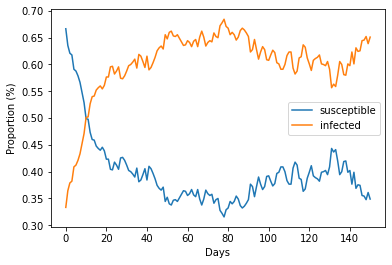

In [2]:
# Agent-based SIQ
import random
import matplotlib.pyplot as plt 
student_id = '1521' #change student id here

# --- Parameters setting --- #
probTrans = 0.3
probRecover = 0.1
initNmS = (int(student_id[0]) + int(student_id[1]))*100
initNmI = (int(student_id[2]) + int(student_id[3]))*100
Population = initNmS+initNmI

numDays = 150
capQ = 0.15*Population

"""
Define Agent class """
class Agent():
    #Constructor
    def __init__(self, health='S'): #by default, one is susceptible
        self.health = health 
        self.loc = 'T' #location is either in town (T, not quarantined) or Q (quarantined)
    #A method to update an agent's health
    def health_update(self):
        if self.health == 'S': #if currently susceptible
            opponent = random.choice([agent for agent in listAllAgents if agent.loc == 'T']) #randomly meet another agent in town-not quarantined
            if opponent.health == 'I': #if opponent is infected
                if random.uniform(0,1) < probTrans: 
                    self.health = 'I' #get infected
                    if len([agent for agent in listAllAgents if agent.loc == 'Q']) < capQ: #if there is room to be quarantined
                        self.loc = 'Q' #get quarantined, otherwise the default loc=T prevails
        else:
            if random.uniform(0,1) < probRecover:
                self.health = 'S' #get recovered, but not automatically return to town
                self.loc = 'T'#Return to town (whether quarantined or not)
"""
Prepare useful functions
"""
# A function to generate a list of agents' health from a list of agents 
def list_healths(listAgents):
    return([agent.health for agent in listAgents])

# A function to calculate the proportion of each health from a list of agents
def count_prop(listAgents):
    listHealth = list_healths(listAgents)
    return listHealth.count('S')/len(listAgents), listHealth.count('I')/len(listAgents)
"""
Initial state
"""
listAllAgents= [Agent('S') for i in range(initNmS)] + [Agent('I') for i in range(initNmI)] 
histPropS=[]
histPropI=[]
propS,propI = count_prop(listAllAgents) 
histPropS.append(propS)
histPropI.append(propI)
"""
Now run the simulation
"""
for day in range(numDays):
    for agent in listAllAgents: 
        agent.health_update()
    propS, propI=count_prop(listAllAgents) 
    histPropS.append(propS)
    histPropI.append(propI)

# --- Plot --- #
plt.plot(histPropS, label='susceptible')
plt.plot(histPropI, label='infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel("Proportion (%)")
plt.show()

In [3]:
print(initNmS, initNmI, capQ)

600 300 135.0


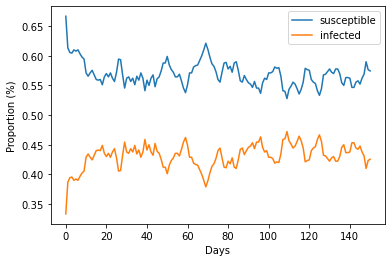

In [4]:
# Econ-based SIQ

# --- Parameters setting --- #
probTrans = 0.3
probRecover = 0.1
initNmS = (int(student_id[0]) + int(student_id[1]))*100
initNmI = (int(student_id[2]) + int(student_id[3]))*100
Population = initNmS+initNmI

numDays = 150
capQ = 0.15*Population
JoyTown = 1.1 #base utility

# --- Agent's class --- #
class Agent():
    #constructor
    def __init__(self,health='S'):
        self.health=health #health='S'(default) or 'I'
        self.loc='T'  
        
    #a method to update an agent's health
    def health_update(self):
        if (self.health,self.loc)==('S','T'):
            opponent=random.choice([agent for agent in listAllAgents if agent.loc=='T'])
            if opponent.health=='I':
                if random.uniform(0,1)<probTrans:
                    self.health='I'
                    if len([agent for agent in listAllAgents if agent.loc=="Q"])<capQ:
                        #if there is a room to be quarantined
                        self.loc='Q'
        else:
            if random.uniform(0,1)<probRecover:
                self.health='S'

    #a method to update an agent's location
    def loc_update(self,propIinT):
        if (self.health,self.loc)!=('I','Q'):
            if random.uniform(0,1)<JoyTown-propIinT:
                self.loc='T'
            else:
                self.loc='H'

# --- Prepare some other functions ---

# Generate a list of agents' health from the list of agents
def list_healths(listAllAgents):
    return([agent.health for agent in listAllAgents])

# Calculate the proportion of each health states (s and i) from a list of agents
def count_prop(listAllAgents):
    listHealth = list_healths(listAllAgents)
    return listHealth.count('S')/len(listAllAgents), listHealth.count('I')/len(listAllAgents)

# A function to calculate the proportion of Infected among all agents in town from the list of agents
def prop_IinT(listAllAgents):
    return(len([agent for agent in listAllAgents if (agent.health, agent.loc) == ('I','T')])/len([agent for agent in listAllAgents if agent.loc == 'T']) )

# --- Initial state --- #
listAllAgents = [Agent('S') for i in range(initNmS)] + [Agent('I') for i in range(initNmI)]
histPropS = []
histPropI = []

propS, propI = count_prop(listAllAgents)
histPropS.append(propS)
histPropI.append(propI)
currPropIinT = prop_IinT(listAllAgents)

# ---- Run simulation --- #
for day in range(numDays):
    for agent in listAllAgents:
        agent.health_update()
        agent.loc_update(currPropIinT)
    propS, propI = count_prop(listAllAgents)
    histPropS.append(propS)
    histPropI.append(propI)
    currPropIinT = prop_IinT(listAllAgents)

# --- Plot --- #
plt.plot(histPropS, label='susceptible')
plt.plot(histPropI, label='infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel("Proportion (%)")
plt.show()